### What is PyTorch

PyTorch is a Python based scientific computing package that provides 2 high-level features:

    1. Tensor computation (like NumPy) with power of GPU for speed
    2. A tape-based autograd system, which provides automatic differentiation while training Deep neural networks.

It is also well-known for a deep learning research platform that provides maximum flexibility and speed.

### Import libraries

In [ ]:
import torch    # arrays on GPU
torch.__version__  # version of PyTorch

In [ ]:
torch.__file__  ## PyTorch resides here

In [ ]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

## Torch Tensors

Tensors are n-dimensional array similar to numpy arrays , but they can utilize power of GPU for accelerated numerical computations.

Tensor are main building block of PyTorch.

Tensors hold all numerical data are also called as data containers.

Tensors also holds more information across linear transformation of tensors which includes Dot Product or cross Product.

The PyTorch data type tensor is also capable of storing what actions were performed on the data (which is information we will need to calculate gradients later on with param requires_grad=True!)

In object oriented programming sense, tensors can be thought of as being object, than merely a datastructure.

### Tensor Initialization
We'll create a tensor using Pytorch Tensor class.

In [ ]:
## Create a Torch tensor of size 1 X 2 X 3:
t=torch.Tensor(1,2,3)  #uninitialized tensor object holds garbage data
t

In [ ]:
#by default object of Tensor class will be FloatTensor
t.type()

In [ ]:
t=torch.randn(2,3)# initialized with random values
t

In [ ]:
#by default object of Tensor class will be FloatTensor
t.type()

torch.Tensor is an alias for the default tensor type (torch.FloatTensor).

A tensor can be constructed from a Python list or sequence using the torch.tensor() constructor. 
Note : torch.tensor() is generally used to create a tensor with pre-existing data.

In [ ]:
t=torch.tensor([10,20,30,40],dtype=torch.long) #initialized with specific values
t

if you initialize torch.tensor() which is a constructor it infers type from data.

In [ ]:
t.shape #gives size of t

In [ ]:
print(f'There are total {t.numel()} elements in t')

In [ ]:
print(f't is organized as {t.dim()} subdimentions')  # it's a vector

### Types of Tensor

#### 1. scalar / 0D Tensor
Scalar holds a single numeric value. A scalar is a 0-dimensional (0D) tensor. It, thus, has 0 axes, and is of rank 0.

For example, value of a pie(π)

you define a tensor with torch.tensor() function

In [ ]:
a = torch.tensor(3.1416) # scalar holds single value
a

to check size or shape of tensor

In [ ]:
a.size() # equivalent to a.shape

to view number of elements in tensor

In [ ]:
a.numel()

dim() method gives number of axes for a tensor also called as rank of a tensor

In [ ]:
a.dim() #scalar is 0D zero dimensional tensor

item() given plain python value

In [ ]:
a.item() 

#### 2. Vector / 1D Tensor
vector can be considered as array of scalars/numbers. It's a 1D one dimensional tensor.

For Example : Daily sales for a week

In [ ]:
b = torch.tensor([43,32,53,78,54,95,20])
b

In [ ]:
b.size()

In [ ]:
b.numel()

In [ ]:
b.dim() #vector is 1D one dimensional tensor

In [ ]:
b[5]  #indexing vector gives scalar

#### 3. Matrix / 2D Tensor
Matrix consists of rows and columns of vectors. Tabular data we see everyday in real life.
It's a 2D two dimensional tensor.Grayscale images can be expressed as 2D tensors.

For Example : wine dataset from sklearn.

In [ ]:
from sklearn.datasets import load_wine
c=load_wine()
c.data.shape

In [ ]:
c['feature_names']

In [ ]:
c['target_names']

In [ ]:
c.data

In [ ]:
c=torch.from_numpy(c.data)
c.size()

In [ ]:
c.numel()

In [ ]:
c.dim() #matrix is 2D two dimensional tensor

In [ ]:
c[-1:]  #indexing matrix gives vector #last row all columns

#### 4. Cube / 3D Tensor
Cube can be considered as matrices stacked together. It's a 3D three dimentional tensor.

For Example : Image data

Mulitchannel image have mostly 3 colour channels (Red, Green, Blue)
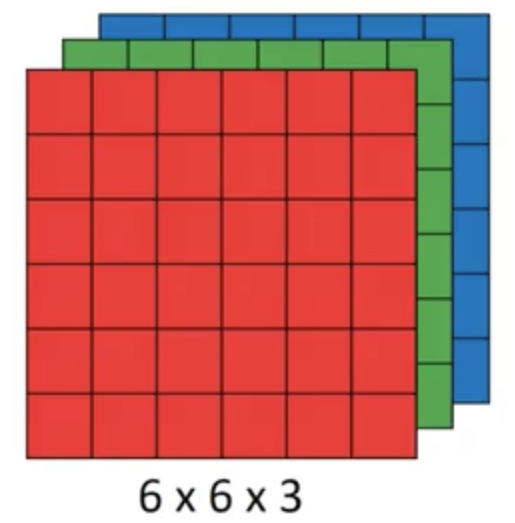

While scalars , vectors  and matrices are valid tensors, generally in Deep Learning when we talk about tensors they will be of dimensionality 3 or more. 

In [ ]:
# Read a dog image from disk using a library called PIL and convert it to numpy array
dog = np.array(Image.open('/Users/vishnu/Documents/The Book/dog.jpeg').resize((299,299)))
Image.open('/Users/vishnu/Documents/The Book/dog.jpeg')

In [ ]:
dog_tensor = torch.from_numpy(dog)
dog_tensor.size()

3D Tensors can be understood as (height, width, colour channels of the image)

In [ ]:
dog_tensor.numel()

In [ ]:
dog_tensor.dim() #cube is 3D three dimensional tensor

In [ ]:
dog_tensor[2:3,-1]  #indexing

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,15))
ax1.imshow(dog_tensor[:,:,0].numpy())
ax1.set_title('Red Channel')
ax1.set_axis_off()

ax2.imshow(dog_tensor[:,:,1].numpy())
ax2.set_title('green Channel')
ax2.set_axis_off()


ax3.imshow(dog_tensor[:,:,2].numpy())
ax3.set_title('blue Channel')
ax3.set_axis_off();

If we need to zoom on dog's face we need to crop image as below, used slicing of tensor

In [ ]:
plt.imshow(dog_tensor[100:160,80:190,].numpy());

#### 5. Vector of cubes / 4D Tensor

4D Tensor is batch of images.
Modern GPUs are efficient in processing multiple set of images faster.
To speed up training we generally use bigger batch size, but it truly depends upon your GPU memory limitations. It's common practise to use batch size of 32 or 64.

In [ ]:
from glob import glob
data_path='/Users/vishnu/Documents/kaggle/catsDogs/train/train_dog/'
#Read dog images from disk
dogs = glob(data_path+'*.jpg')
#Convert images into numpy arrays
dog_imgs = np.array([np.array(Image.open(dog).resize((224,224))) for dog in dogs[:64]]) 
dog_imgs = dog_imgs.reshape(-1,224,224,3)
dog_tensors = torch.from_numpy(dog_imgs)
dog_tensors.size()

4D Tensors can be understood as (batch_size,height, width, colour channels of the image)

#### 6. 5D tensor

5D Tensors store video data with each frame considered as single image.
So they can be expressed as (batch_size,frame,height, width, colour channels of the image)

### Identity matrices, Fill Tensor with 0, 1 or values


In [ ]:
eye = torch.eye(3)   
eye #Creates an identity 3x3 tensor

In [ ]:
eye.nonzero() # index(i,j) of non-zero elements

In [ ]:
v = torch.ones(2,3)              # A tensor of size 10 containing all ones
v

In [ ]:
v = torch.ones_like(eye)        # A tensor with same shape as eye. Fill it with 1.
v

In [ ]:
v = torch.zeros(2,2)             # A tensor of size 10 containing all zeros
v

In [ ]:
v = torch.ones(3, 3) # fill tensor row/column with specified value
v[1].fill_(2)
v[2].fill_(3)
v

### Initialize Tensor with a range of value


In [ ]:
v = torch.arange(6)     # creating a Tensor Size 6 ezuivalent to range(start=0, end=6, step=1)
v

In [ ]:
v = torch.arange(9)
v = v.view(3, 3)
v

### Tensor  attributes
Each torch.Tensor has a torch.dtype, torch.device, and torch.layout.
torch.dtype we have already seen.

A torch.dtype is an object that represents the data type of a torch.Tensor. PyTorch has eight different data types:


#### torch.dtype()

A torch.dtype is an object that represents the data type of a torch.Tensor. 

There are eight datatypes supported by PyTorch: five integer types (8-bit signed, 8-bit unsigned, 16-bit, 32-bit, and 64-bit) and three float types (16-bit, 32-bit, and 64-bit). 
The dtype of a tensor can be access via its t.dtype() attribute.

In [ ]:
t=torch.Tensor(1,2,3) 
t.dtype

#### torch.device 
It is an object representing the device on which a torch.Tensor is or will be allocated either a 'cpu' or 'cuda' for GPU.
A torch.Tensor’s device can be accessed via the Tensor.device property.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
t.device

In [ ]:
t=t.cuda()

In [ ]:
t.device

You can assign specific GPU to your tensors.

In [ ]:
cuda0 = torch.device('cuda',0)
x=torch.randn((2,3), device=cuda0)
x

#### torch.layout

A torch.layout is an object that represents the memory layout of a torch.Tensor. 

torch.layout represents the data layout of a Tensor. Currently torch.strided (dense tensors, the default) and torch.sparse_coo (sparse tensors with COO format) are supported.

The layout of a tensor can be access via its layout attribute.

torch.strided represents dense Tensors and is the memory layout that is most commonly used. Each strided tensor has an associated torch.Storage, which holds its data. These tensors provide multi-dimensional, strided view of a storage. Strides are a list of integers: the k-th stride represents the jump in the memory necessary to go from one element to the next one in the k-th dimension of the Tensor. This concept makes it possible to perform many tensor operations efficiently.

In [55]:
t=torch.Tensor(1,2,3)  #uninitialized tensor object holds garbage data

In [56]:
t.layout

torch.strided

In [57]:
t.storage()

 0.0
 -3.6893488147419103e+19
 -5.546566963195801
 -1.0844663532936386e-19
 nan
 nan
[torch.FloatStorage of size 6]

## Tensor Operations

### Transpose tensor

With transposition you can convert a row in to a column and vice versa

In [58]:
x=torch.Tensor([[10,20],[30,40]])
x

tensor([[10., 20.],
        [30., 40.]])

In [59]:
x=x.t() 
x

tensor([[10., 30.],
        [20., 40.]])

In [60]:
# Transpose (via permute)
x.permute(-1,0)

tensor([[10., 20.],
        [30., 40.]])

In [61]:
# Transpose dim 0 and 1
r = torch.transpose(x, 0, 1)
r

tensor([[10., 20.],
        [30., 40.]])

In [62]:
t = torch.Tensor([[1,2,3,4,5],[6,7,8,9,10]])
t

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]])

### Resize Tensors
If you want to resize/reshape tensor, you can use torch.view:



In [63]:
t.view(-1,2) #all rows , 2 columns

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [64]:
t.view(10)                    # Resize x to size 10

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [65]:
t.view(5, -1)

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [66]:
# Create tensor from normal distribution randoms
t = torch.randn(4, 3)
t

tensor([[-0.7265, -0.0713,  2.4472],
        [ 1.1300, -1.1269,  0.6529],
        [-0.8807,  0.4432, -0.2851],
        [ 0.9448, -1.3391, -0.5675]])

In [67]:
x = torch.randn(4, 4)
print(x)
y = x.view(16)
print(y)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(z)
print(x.size(), y.size(), z.size())

tensor([[ 1.0384,  1.5474,  0.1982, -1.2402],
        [-1.1609,  0.1446,  0.1623, -1.9552],
        [ 0.9160, -0.1237, -1.2353, -0.1789],
        [ 0.8706, -0.9365, -0.7541, -0.8562]])
tensor([ 1.0384,  1.5474,  0.1982, -1.2402, -1.1609,  0.1446,  0.1623, -1.9552,
         0.9160, -0.1237, -1.2353, -0.1789,  0.8706, -0.9365, -0.7541, -0.8562])
tensor([[ 1.0384,  1.5474,  0.1982, -1.2402, -1.1609,  0.1446,  0.1623, -1.9552],
        [ 0.9160, -0.1237, -1.2353, -0.1789,  0.8706, -0.9365, -0.7541, -0.8562]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


### Converting Torch Tensor to numpy array
Note :The Torch Tensor and NumPy array will share their underlying memory locations, 
and changing one will change the other.

Note : All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

Warning

torch.tensor() always copies data. If you have a Tensor data and want to avoid a copy, use torch.Tensor.requires_grad_() or torch.Tensor.detach(). If you have a NumPy ndarray and want to avoid a copy, use torch.from_numpy().

In [68]:
a = torch.ones(3)
print(a) #gives tensor

tensor([1., 1., 1.])


In [69]:
b=a.numpy() #makes tensor to numpy array
b

array([1., 1., 1.], dtype=float32)

In [70]:
a.mul_(2) # bth a and be will get affected ** Assesment questions activity
print(a)
b

tensor([2., 2., 2.])


array([2., 2., 2.], dtype=float32)

### Converting numpy array to Torch Tensor 


In [71]:
a = np.ndarray([2, 2])
print(a)
b = torch.from_numpy(a)
b

[[  0.           0.        ]
 [372.325      217.51818182]]


tensor([[  0.0000,   0.0000],
        [372.3250, 217.5182]], dtype=torch.float64)

In [72]:
np.add(a, 1, out=a)


array([[  1.        ,   1.        ],
       [373.325     , 218.51818182]])

In [73]:
b


tensor([[  1.0000,   1.0000],
        [373.3250, 218.5182]], dtype=torch.float64)

In [74]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])
print(x)
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
print(y)
# Convert the torch tensor to a numpy array.
z = y.numpy()
z
x

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


array([[1, 2],
       [3, 4]])

### Tensor Slicing and Indexing
The contents of a tensor can be accessed and altered using Python’s indexing and slicing notation

In [75]:
t = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
t

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [76]:
# all rows, all columns except the last 
print(t[:, -1])

# First 2 rows, all columns
print(t[:2, :])

# Lower right most corner
print(t[-1:, -1:])

tensor([3., 6., 9.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[9.]])


In [77]:
t[1,:2] #2nd row, 1st 2 columns

tensor([4., 5.])

In [78]:
t[1,2:]## whats happening

tensor([6.])

In [79]:
t[:, 1]                          # Can use numpy type indexing
t[:, 0] = 0                      # For assignment
t

tensor([[0., 2., 3.],
        [0., 5., 6.],
        [0., 8., 9.]])

In [80]:
t.narrow( 1, 1, 2 ) # Tensor.narrow(dim, start_idx, length)

tensor([[2., 3.],
        [5., 6.],
        [8., 9.]])

### Convert Tensors to GPU and back to CPU

1. PyTorch tensors have inherent GPU support. 
1. Specifying to use the GPU memory and CUDA cores for storing and performing tensor calculations is easy.
1. The cuda package can help determine whether GPUs are available, and 

The Tensor s’ method cuda() returns a clone on the GPU if the tensor is not
already there or returns the tensor itself if it was already there, keeping the bit
precision. Conversely the method cpu() makes a clone on the CPU if needed.
They both keep the original tensor unchanged

The method torch.cuda.is available() returns a Boolean value indicating
if a GPU is available.

In [81]:
torch.cuda.is_available()

False

In [82]:
t = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
t

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [83]:
# Move tensor to GPU
t.cuda()

AssertionError: Torch not compiled with CUDA enabled

In [84]:
# Move tensor back to CPU
t.cpu()

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

### Operations

In [85]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[5,6],[7,8]])
z=x+y
z

tensor([[ 6,  8],
        [10, 12]])

In [86]:
torch.add(x,y,out=z)
z

tensor([[ 6,  8],
        [10, 12]])

In [87]:
# inplace operations with '_'
x.add_(y)  # equivalent to x = x + y
x

tensor([[ 6,  8],
        [10, 12]])

### Statistical Operations / Reduction Functions

In [88]:
x=torch.Tensor(3)
x.fill_(0.5)
x

tensor([0.5000, 0.5000, 0.5000])

In [89]:
x.mean()

tensor(0.5000)

In [90]:
x.median()

tensor(0.5000)

In [91]:
x.std()

tensor(0.)

In [92]:
x.sum()

tensor(1.5000)

In [93]:
x.norm()

tensor(0.8660)

In [94]:
t = torch.normal(torch.zeros(5,5), torch.ones(5,5)) 
# Tensor.normal(means=0, std=1) <- Create tensor with random normal values.
# Means and std devs given as tensor
t

tensor([[ 0.8345,  0.8339, -0.7860,  0.1964,  3.5679],
        [ 0.6558, -0.0950,  0.2485, -0.7344, -0.7006],
        [-1.2559, -1.0839, -1.0384,  1.2386, -1.3334],
        [-0.5007, -0.4020,  0.0675,  0.5710, -0.5723],
        [-0.5471, -0.3139, -0.3292,  0.2373,  1.9182]])

### Elementwise multiplication

In [95]:
a = torch.Tensor([[1, 2], [3, 4]])
b = torch.Tensor([[5, 6], [7, 8]])

print(a)
b

tensor([[1., 2.],
        [3., 4.]])


tensor([[5., 6.],
        [7., 8.]])

In [96]:
a.mul(b)

tensor([[ 5., 12.],
        [21., 32.]])

### Cross Product

In [97]:
# Compute cross product
t1 = torch.ones(2, 3)
t1

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [98]:
t2 = torch.Tensor([[1,2,3],[4,5,6]])
t2

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [99]:
t1.cross(t2)

tensor([[ 1., -2.,  1.],
        [ 1., -2.,  1.]])

### matrix multiplication
A of shape (m x n) and B of shape (n x l) multiplied gives C of shape (m x l)

A=[aij]mxn

AT=[aji]n×m



In [100]:
a=torch.Tensor([[1, 2], [5, 6]])
b=torch.Tensor([[3], [4]])
t = a.mm(b)
t

tensor([[11.],
        [39.]])

In [101]:
a, torch.ones(2)

(tensor([[1., 2.],
         [5., 6.]]), tensor([1., 1.]))

In [102]:
#Multiply matrix by vector
torch.mv(a,torch.ones(2) ) # torch.mv(mat, vec, out=None)torch.ones(2)
# (1*1 + 2*1
#  5*1 + 6*1)

tensor([ 3., 11.])

### Dot product

In [103]:
a = torch.dot(torch.Tensor([1, 2]), torch.Tensor([3, 4])) 
a

tensor(11.)

###  Concatenations

In [104]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[5,6],[7,8]])
torch.cat((x, y), dim=1)          # Concatenate in the 0 dimension

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

### Stacking

In [105]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[5,6],[7,8]])

r = torch.stack((x, y),dim=1)
r

tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])

To dig deeper into Tensors, head over to official [Tensor API doc](https://pytorch.org/docs/stable/torch.html#tensors).